In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [76]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [ ]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
data.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [ ]:
data.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [ ]:
data.shape

(413840, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
data.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [ ]:
nullValue = data.isnull().sum()
print(nullValue)

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64


In [ ]:
pourcentage = (nullValue / len(data)) * 100
print(pourcentage , " %")

Product Name     0.000000
Brand Name      15.747874
Price            1.433646
Rating           0.000000
Reviews          0.016915
Review Votes     2.971197
dtype: float64  %


In [ ]:
data['Reviews'].head()

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object

In [ ]:
data['Brand Name'].unique()

array(['Samsung', 'Nokia', nan, 'HTM', 'Jethro', 'e passion',
       'Cedar Tree Technologies', 'Indigi', 'Phone Baby', 'OtterBox',
       'Lenovo', 'Huawei', 'JUNING', 'Elephone', 'Plum', 'VKworld',
       'NOKIA', 'Ulefone', 'Jiuhe', 'inDigi', 'Acer', 'Aeku', 'AKUA',
       'Alcatel', 'TCL Mobile', 'LG', 'amar', 'Amazon', 'Odysseus',
       'Digital SNITCH', 'star', 'Android', 'Yezz', 'Yezz Wireless Ltd.',
       'Apple', 'Apple Computer', 'Certified Refurbished',
       'Amazon.com, LLC *** KEEP PORules ACTIVE ***', 'apple',
       'ARGOM TECH', 'Asus', 'ASUS', 'ASUS Computers', 'asus',
       'BlackBerry', 'Motorola', 'Palm', 'Pantech', 'ZTE', 'ATT',
       'UnAssigned', 'Atoah',
       'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
       'WorryFree Gadgets', 'worryfree', 'iDROID USA', 'Blackberry (Rim)',
       'Research In Motion', 'BLACKBERRY', 'Black Berry', 'Blackberry',
       'blackberry', 'RIM', 'Research 

In [ ]:
data.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

In [ ]:
data = data.dropna(subset=['Reviews'])

In [ ]:
data.isna().sum()

Product Name        0
Brand Name      65154
Price            5930
Rating              0
Reviews             0
Review Votes    12296
dtype: int64

In [32]:
data['Product Name']

0         "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...
1         "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...
2         "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...
3         "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...
4         "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...
                                ...                        
413835    Samsung Convoy U640 Phone for Verizon Wireless...
413836    Samsung Convoy U640 Phone for Verizon Wireless...
413837    Samsung Convoy U640 Phone for Verizon Wireless...
413838    Samsung Convoy U640 Phone for Verizon Wireless...
413839    Samsung Convoy U640 Phone for Verizon Wireless...
Name: Product Name, Length: 413770, dtype: object

In [33]:
data  =data.drop(columns = {'Brand Name'})

In [34]:
data.columns

Index(['Product Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], dtype='object')

In [35]:
data.isna().sum()

Product Name        0
Price            5930
Rating              0
Reviews             0
Review Votes    12296
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413770 entries, 0 to 413839
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413770 non-null  object 
 1   Price         407840 non-null  float64
 2   Rating        413770 non-null  int64  
 3   Reviews       413770 non-null  object 
 4   Review Votes  401474 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.9+ MB


In [39]:
priceMean = round(data['Price'].mean(),2)

In [40]:
priceMean

226.87

In [41]:
data['Price'].fillna(priceMean, inplace=True)

In [42]:
data.isna().sum()

Product Name        0
Price               0
Rating              0
Reviews             0
Review Votes    12296
dtype: int64

In [48]:
data.tail(10)

,Product Name,Price,Rating,Reviews,Review Votes
413830,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,LOVE IT,0.0
413831,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,1,"Item was listed as new, but was not. When we t...",0.0
413832,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,4,good rugged phone that has a long-lasting batt...,0.0
413833,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,3,The phone is good,0.0
413834,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,1,used hard,0.0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [49]:
data['Review Votes'].unique()

array([  1.,   0.,   2.,   6.,  19.,  12.,  13.,  17.,   4.,   9.,   3.,
         5.,  16.,   7.,  11.,  15.,   8.,  23.,  14.,  20.,  24.,  nan,
        18.,  10.,  41.,  59.,  42., 116.,  22.,  57.,  21.,  32.,  54.,
        30.,  77., 115.,  39.,  31.,  64., 124.,  36., 100., 125.,  28.,
        86.,  25.,  43.,  27., 120.,  72., 121.,  48.,  33.,  75.,  40.,
        37., 249.,  38., 130., 112., 157.,  51.,  58.,  63., 107.,  52.,
        34.,  46.,  45.,  85., 105., 366.,  29., 138.,  67.,  62.,  35.,
        47., 177.,  80.,  66.,  68.,  84., 152.,  53., 113., 151., 141.,
       159., 128.,  94.,  79.,  56.,  78.,  55.,  61.,  50.,  76., 127.,
        96., 119.,  87.,  60., 192.,  44.,  49., 126.,  26.,  81.,  88.,
       158.,  92., 155., 154., 156., 106., 175., 103., 172., 118.,  83.,
       296., 136.,  73.,  74.,  90.,  65., 283., 282., 288., 285., 270.,
       265., 478., 462., 465., 171.,  98.,  99., 169., 213., 110., 183.,
        71., 109., 114., 182., 221., 487., 170.,  9

In [58]:
dataMean = data['Review Votes'].mean()

In [59]:
data.fillna(2.0, inplace=True)

In [60]:
data.isna().sum()

Product Name    0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [78]:
data  =data.drop(columns = {'Sentiment'})

In [79]:
data.columns

Index(['Product Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], dtype='object')

In [80]:
analyzer = SentimentIntensityAnalyzer()

In [81]:
def get_sentiment_vader(review):
    scores = analyzer.polarity_scores(review)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [82]:
data['Sentiment'] = data['Reviews'].apply(get_sentiment_vader)

In [83]:
data.columns

Index(['Product Name', 'Price', 'Rating', 'Reviews', 'Review Votes',
       'Sentiment'],
      dtype='object')

In [86]:
positive_sentiment_data = data[data["Sentiment"] == "Positive"]
negative_sentiment_data = data[data["Sentiment"] == "Negative"]
neutral_sentiment_data = data[data["Sentiment"] == "Neutral"]

In [87]:
positive_sentiment_data

,Product Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,5,Very pleased,0.0,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,It works good but it goes slow sometimes but i...,0.0,Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,Great phone to replace my lost phone. The only...,0.0,Positive
...,...,...,...,...,...,...
413832,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,4,good rugged phone that has a long-lasting batt...,0.0,Positive
413833,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,3,The phone is good,0.0,Positive
413835,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,another great deal great price,0.0,Positive
413836,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,3,Ok,0.0,Positive


In [88]:
negative_sentiment_data

,Product Name,Price,Rating,Reviews,Review Votes,Sentiment
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,1,I already had a phone with problems... I know ...,1.0,Negative
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,2,The charging port was loose. I got that solder...,0.0,Negative
15,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,2,Had this phone before and loved it but was not...,0.0,Negative
20,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,4,The battery was old & had been over used becau...,0.0,Negative
22,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",199.99,1,I purchased this phone in December as a christ...,19.0,Negative
...,...,...,...,...,...,...
413820,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,1,They said phone was normal wear but it was a l...,0.0,Negative
413821,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,"You could shoot this out of a potato gun, and ...",0.0,Negative
413834,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,1,used hard,0.0,Negative
413837,Samsung Convoy U640 Phone for Verizon Wireless...,79.95,5,Passes every drop test onto porcelain tile!,0.0,Negative


<ipython-input-90-41e38ccb3067>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_names, y=sentiment_values, palette='Set2')


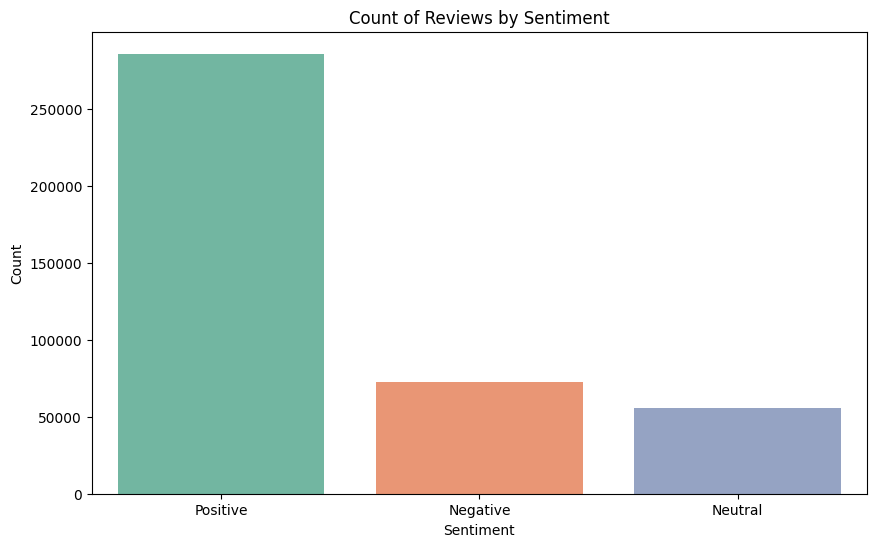

In [90]:
sentiment_counts = data['Sentiment'].value_counts()
sentiment_names = sentiment_counts.index.to_list()
sentiment_values = sentiment_counts.to_list()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_names, y=sentiment_values, palette='Set2')
plt.title('Count of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


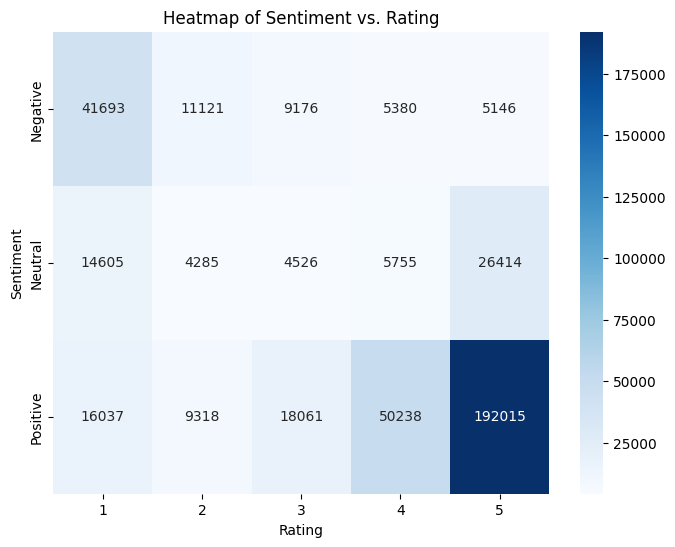

In [93]:
sentiment_rating_crosstab = pd.crosstab(data['Sentiment'], data['Rating'])
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_rating_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Sentiment vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()

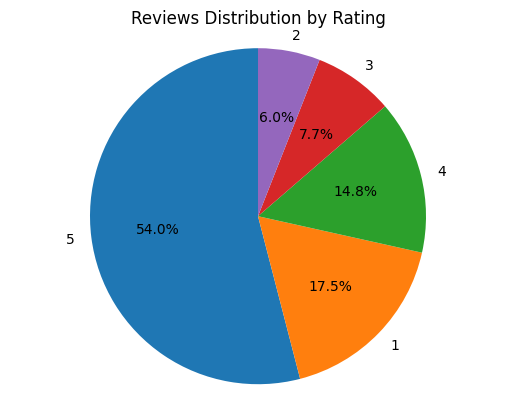

Rating
5    223575
1     72335
4     61373
3     31763
2     24724
Name: count, dtype: int64


In [101]:
ratings_count = data['Rating'].value_counts()
labels = ratings_count.index.to_list()
sizes = ratings_count.to_list()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Reviews Distribution by Rating')
plt.show()
print(ratings_count)


In [112]:
data['Sentiment_Score'] = data['Reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment'], test_size=0.2, random_state=42)

In [113]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [114]:
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [115]:
positive_features = vectorizer.get_feature_names_out()[model.feature_log_prob_[1].argsort()[-10:]]
negative_features = vectorizer.get_feature_names_out()[model.feature_log_prob_[0].argsort()[-10:]]

In [116]:
positive_products = data[data['Sentiment'] == 'Positive']['Product Name'].value_counts().head(10)
negative_products = data[data['Sentiment'] == 'Negative']['Product Name'].value_counts().head(10)

In [123]:
print(f'Top products in positive reviews: {positive_products}')
print("........................................................")
print(f'Top products in negative reviews: {negative_products}')

Top products in positive reviews: Product Name
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink     892
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                             880
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone               874
Huawei Mate 2 - Factory Unlocked (Black)                                                  856
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)      856
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- US GSM Unlocked - Grey        825
Apple iPhone 5s 32GB (Silver) - AT&T                                                      816
Motorola Moto E (1st Generation) - Black - 4 GB - US GSM Unlocked Phone                   816
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                                              784
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- Global GSM Unlocked - Grey    784
Name: count, 